In [1]:
import seaborn as sns
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# View the first few rows of the dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


The Titanic dataset includes information about the passengers involved in the sad fate of RMS Titanic, which sank in 1912. It includes many columns that provide demographic and characteristics insight into the passengers. The first column tells the survival of a passenger: 0 referring to 'no' and 1 referring to 'yes'. The second column is the passenger's class; this is usually in the range 1 to 3, with 1 being first class, 2 being second class, and 3 being third class. The third column contains gender information: male or female. The fourth column is the age in years of the passenger. Other columns are: the number of siblings/spouses aboard, SibSp; the number of parents/children, Parch; the fare paid, Fare; the embarkation point, C for Cherbourg, Q for Queenstown, S for Southampton; and additional categorical information about the passenger: title and whether they were travelling alone. This dataset is very useful for conducting survival rate studies and observing the many socio-economic factors affecting the passengers' experience of the tragedy.


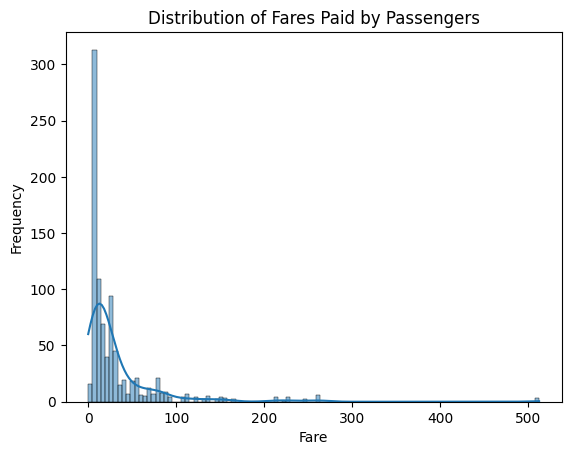

In [3]:
# Plot a histogram and KDE for the distribution of fares
sns.histplot(titanic['fare'], kde=True)
plt.title('Distribution of Fares Paid by Passengers')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


The histogram of fares paid by Titanic passengers is very right-skewed, with most fares falling in the 0-20 range, meaning there were a lot of third-class travelers. Notably, there are several outliers where some passengers paid more than 300 in light of first-class accommodations. This distribution postulates that passengers who paid higher fares  had a greater chance of survival compared to those classes that paid lower fares. Socioeconomic factors, therefore, played a major role because first-class passengers were normally the ones who could reach lifeboats during the evacuation. Thus, the fare distribution underlines large class disparities in the influence of survival rates within the Titanic disaster.

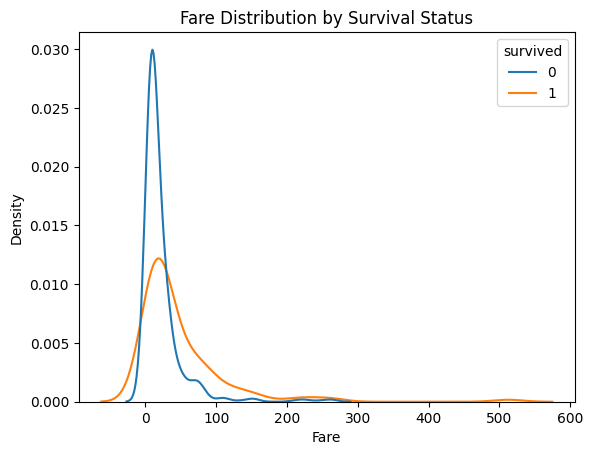

In [4]:
# Create a KDE plot to compare the fare distributions for survivors and non-survivors
sns.kdeplot(data=titanic, x='fare', hue='survived', common_norm=False)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()


The density plot of fare distribution by survival status clearly outlines the relation of fare with survival on the Titanic. Passengers who did not survive are represented by the blue line, where the majority paid low fares and could mostly be third-class passengers. On the other hand, survivors represented by the orange line tend to pay higher fares, with a fair number of passengers at levels above 100, reflecting many first-class passengers. This, therefore, is the inconsistency that might reflect the critical involvement of socioeconomic status in survival, where persons who could afford higher fares had better access to the lifeboats and other means of safety. Overall, as the data reveals, the fare was an influential variable for survival; it was highly correlated with the socioeconomic backgrounds of passengers.

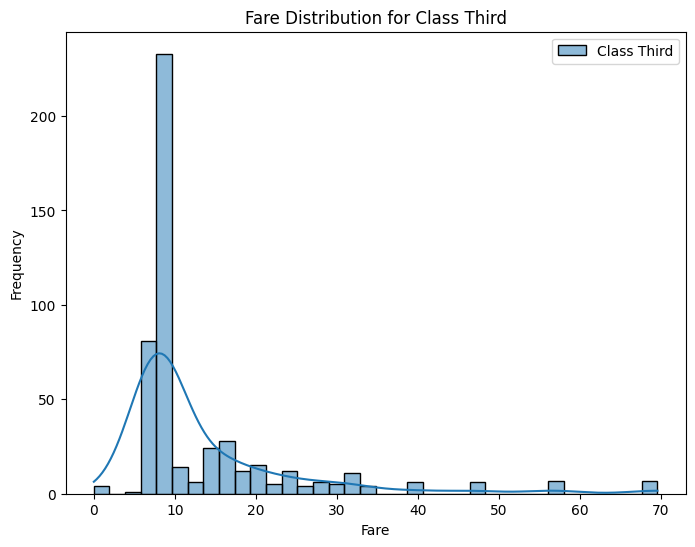

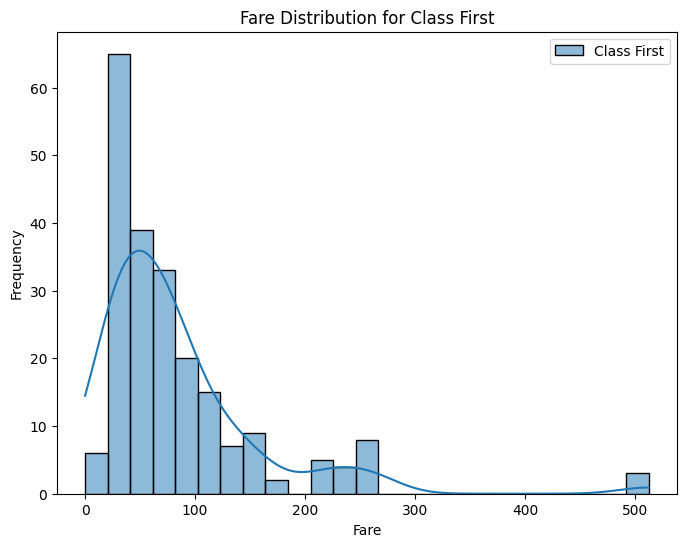

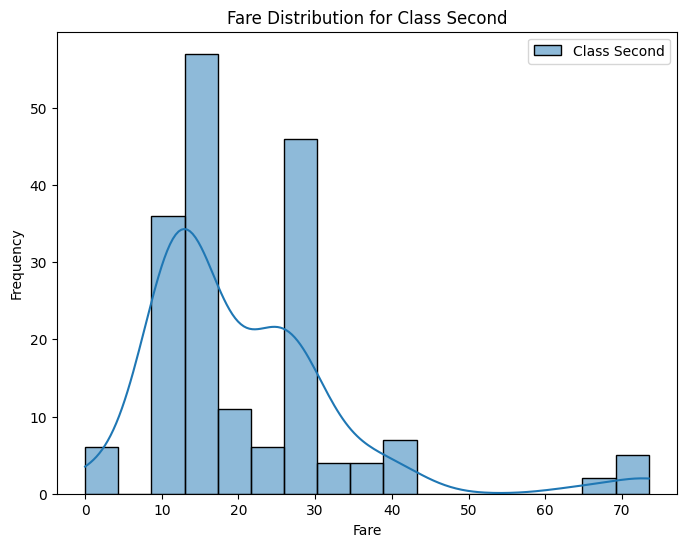

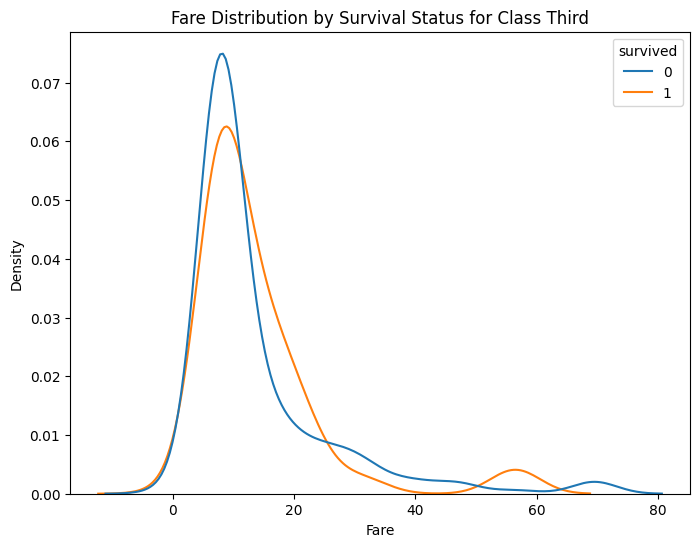

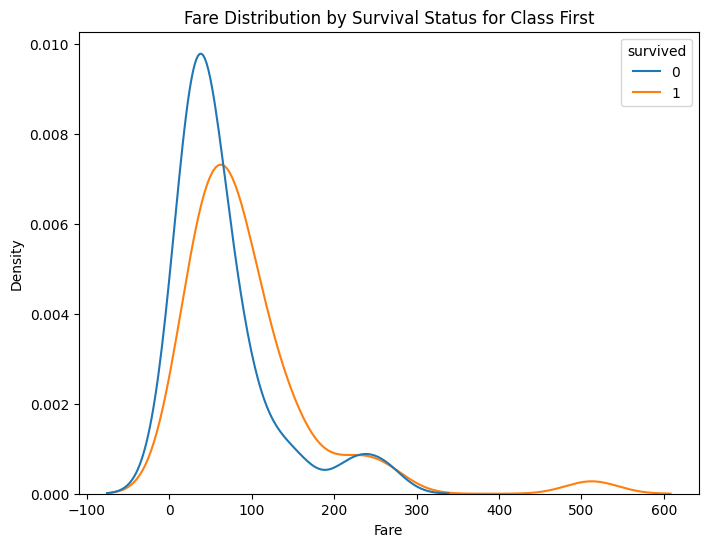

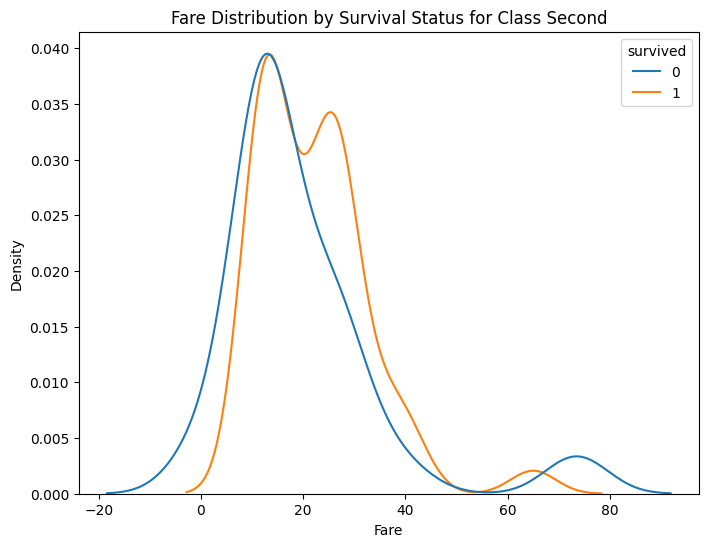

Survival Rates by Passenger Class:
class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64


<ipython-input-5-30e543111eb8>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = titanic.groupby('class')['survived'].mean()


In [5]:

# Create histograms and KDE plots for fare distributions by passenger class
for pclass in titanic['class'].unique():
  subset = titanic[titanic['class'] == pclass]
  plt.figure(figsize=(8, 6))
  sns.histplot(subset['fare'], kde=True, label=f'Class {pclass}')
  plt.title(f'Fare Distribution for Class {pclass}')
  plt.xlabel('Fare')
  plt.ylabel('Frequency')
  plt.legend()
  plt.show()

# Create KDE plots to compare fare distributions for survivors and non-survivors within each class
for pclass in titanic['class'].unique():
  subset = titanic[titanic['class'] == pclass]
  plt.figure(figsize=(8, 6))
  sns.kdeplot(data=subset, x='fare', hue='survived', common_norm=False)
  plt.title(f'Fare Distribution by Survival Status for Class {pclass}')
  plt.xlabel('Fare')
  plt.ylabel('Density')
  plt.show()

# Calculate and print survival rates for each passenger class
survival_rates = titanic.groupby('class')['survived'].mean()
print("Survival Rates by Passenger Class:")
print(survival_rates)


The data reveals significant patterns in fare distribution and survival rates across passenger classes on the Titanic, reflecting socioeconomic divisions. First-class passengers had the highest survival rate at 62.96%, compared to 47.28% for second-class and just 24.24% for third-class passengers. It really suggests that those who paid more for their tickets had better access to evacuation methods.

First-class passengers paid a mean fare of 84.15, while second-class passengers averaged 20.66 and third-class passengers only 13.68. The higher fares in first class corresponded with better survival chances. Notably, first-class survivors paid an average fare of 95.61, compared to 64.68 for non-survivors, indicating wealth provided a significant advantage. In contrast, survival rates in third class were nearly identical regardless of fare, showing that fare alone did not greatly impact survival in this group. Overall, these patterns highlight how socioeconomic status influenced survival outcomes on the Titanic.

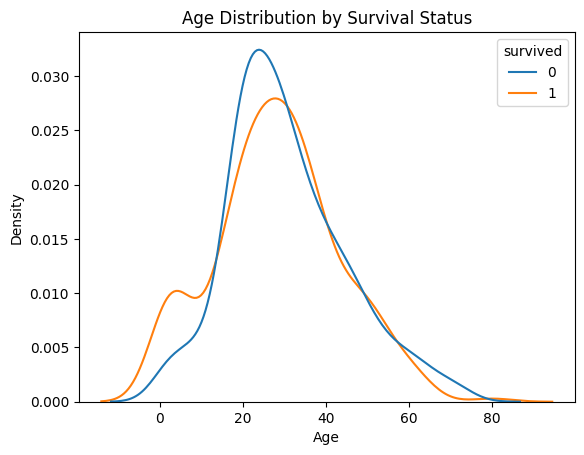

In [6]:
# Create KDE plots to compare age distributions for survivors and non-survivors
sns.kdeplot(data=titanic, x='age', hue='survived', common_norm=False)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


It can be observed from this table that the highest percentage of survival was among children, at 59.4%, meaning this age group was saved upon evacuation, which could be credited to the "women and children first" policy. In the young adult groups, the survival rates were lower: 38.3% for the 11–20 age group and 36.5% for the 21–30 age group. This indicates that young men who were not traveling with families or not classified as women were not given preferential treatment. Middle-aged adults, aged between 31–50 years, had moderate survival rates that ranged from 38–44%; this perhaps reflects that some beneficiaries had class advantages or better physical capabilities. In contrast, 40.5% of older adults were between 51–60 years, while survival saw a drastic fall for those over 60-just 23.5% for 61–70 and 20% for 70+. This decline signals how physical limitations and lower prioritization weighed on the older passenger. On the whole, data indicate that the younger one was, especially a child, the better the chances of survival were, whereas vice-versa, survival rates declined with increasing age.

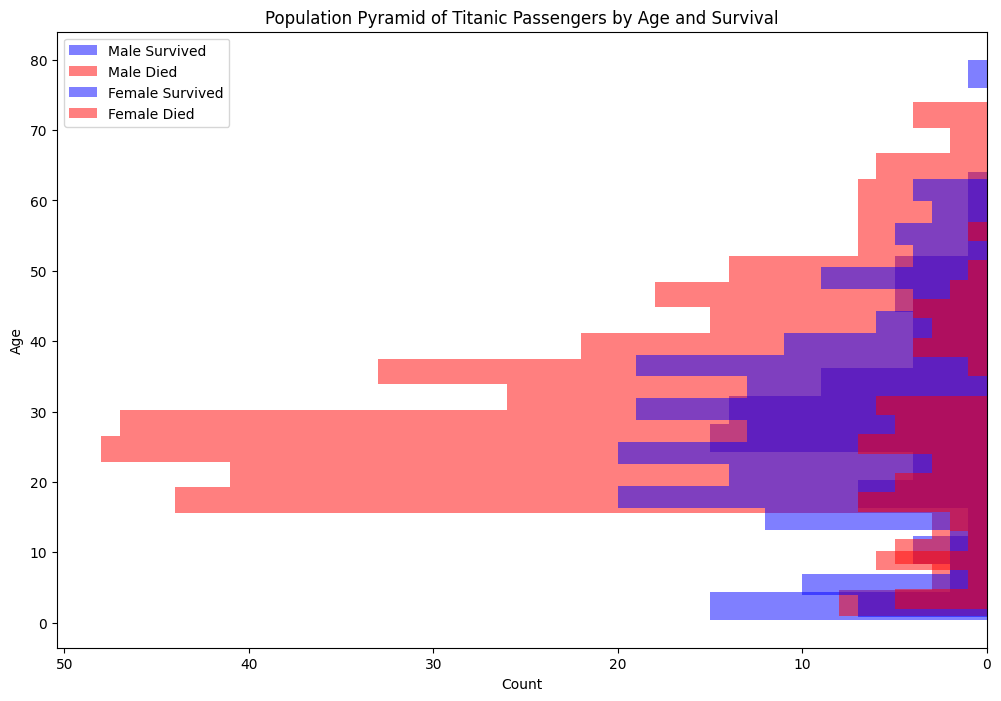

In [9]:
# Prepare data for the population pyramid
survived_male = titanic[(titanic.sex == 'male') & (titanic.survived == 1)]['age']
died_male = titanic[(titanic.sex == 'male') & (titanic.survived == 0)]['age']
survived_female = titanic[(titanic.sex == 'female') & (titanic.survived == 1)]['age']
died_female = titanic[(titanic.sex == 'female') & (titanic.survived == 0)]['age']

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the male data
ax.hist(survived_male, bins=20, alpha=0.5, color='blue', label='Male Survived', orientation='horizontal')
ax.hist(died_male, bins=20, alpha=0.5, color='red', label='Male Died', orientation='horizontal')

# Plot the female data
ax.hist(survived_female, bins=20, alpha=0.5, color='blue', label='Female Survived', orientation='horizontal')
ax.hist(died_female, bins=20, alpha=0.5, color='red', label='Female Died', orientation='horizontal')



# Customize the plot
ax.set_xlabel('Count')
ax.set_ylabel('Age')
ax.set_title('Population Pyramid of Titanic Passengers by Age and Survival')
ax.legend()

# Invert the x-axis to create the pyramid effect
ax.invert_xaxis()

plt.show()


The distribution of age and sex in relation to the survival rate of the passengers shows several insights into how the survival rate was factored by gender and age during this disaster. The age group 0-10 years had high survival rates in both genders, as 19 males and 19 females survived, indicating that there was a tendency to prioritize the children during the evacuation, adhering to the "women and children first" policy. Starting with the 11-20 age group, males had a much lower survival rate: 10 surviving compared to 34 females. It then follows in the 21-30 group: 23 males died, where 61 females survived, which suggests that women did, in fact, have the distinct advantage regarding survival, perhaps due to priority treatment in the use of lifeboats. In adults between 31 and 50 years of age, survival rates were somewhat even but still favorable for females. In the 31-40 age group, there were 23 surviving males as opposed to just eight dying females to show some equity in that grouping. Still, the survival numbers in the 41-50 age group remained considerably lower for males than it was for females. In the older class of individuals who were above 51 years of age, both genders showed a severe decline in the survival rate with literally a handful of survivors to count in each category. For instance, only 4 males survived in the age group 51-60 years, and only 1 male survived within the age brackets of 61-70 years. That is to say that the elderly had the worst time trying to get away. It can be seen in this table that gender played a vital role in survival-the females generally outlived the males in most of the age groups. Also, the survival chances were higher in the case of younger individuals, especially children. The survival rates for older adults were considerably low due to physical challenges and potential prioritization in the evacuation process.